
#### Author : Riasad Alvi
#### Date   : 24 March 2025





## **Autograd in PyTorch**  

#### **Definition:**  
Autograd (Automatic Differentiation) is PyTorch’s built-in system for computing **gradients (derivatives)** automatically. It is a crucial component for training deep learning models, as it enables **backpropagation** by tracking operations and calculating gradients efficiently.  

#### **Conceptual Explanation:**  
Autograd builds a **computational graph**, where each operation on tensors is recorded. When we call `.backward()`, PyTorch **traverses this graph in reverse** to compute gradients for each parameter. These gradients are then used to update the model’s parameters during optimization.  

#### **Working Mechanism (Step-by-Step):**  
1. **Forward Pass:** The model makes a prediction using input data.  
2. **Loss Calculation:** The difference between predicted and actual values is computed.  
3. **Backward Pass (Gradient Calculation):**  
   - Autograd computes the derivatives of the loss with respect to each parameter.  
   - This is done using the **chain rule** from calculus.  
4. **Parameter Update:** The optimizer updates model parameters using the gradients to minimize the loss.  

#### **Importance of Autograd:**  
- **Automatic Gradient Computation:** Eliminates the need for manual differentiation.  
- **Efficient Backpropagation:** Enables training of deep learning models by computing gradients automatically.  
- **Handles Complex Computations:** Works seamlessly with large neural networks.  
- **Optimized Performance:** Computes only required gradients, improving efficiency.  

In [1]:
import torch

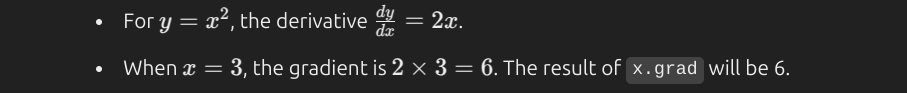

In [18]:
# Creates a tensor with autograd enabled for gradient computation
x = torch.tensor(3.0, requires_grad=True)

In [19]:
# Computes y as the square of x; enables automatic differentiation (just defining the function)
y = x**2

In [20]:
x

tensor(3., requires_grad=True)

In [21]:
y

tensor(9., grad_fn=<PowBackward0>)

In [22]:
# Computes the gradient of y with respect to x
y.backward()

In [23]:
# Returns the computed gradient of y with respect to x
x.grad

tensor(6.)

### Another Example :

In [37]:
# An example of a computational graph:
# x -> square -> y -> sin -> z

# Step 1: Define x with requires_grad set to True
x = torch.tensor(4.0, requires_grad=True)

# Step 2: Compute y as the square of x
y = x**2

# Step 3: Compute z as the sine of y
z = torch.sin(y)

# Step 4: Perform backward pass to compute dz/dx
z.backward()

# Step 5: Get the gradient dz/dx
x.grad


tensor(-7.6613)

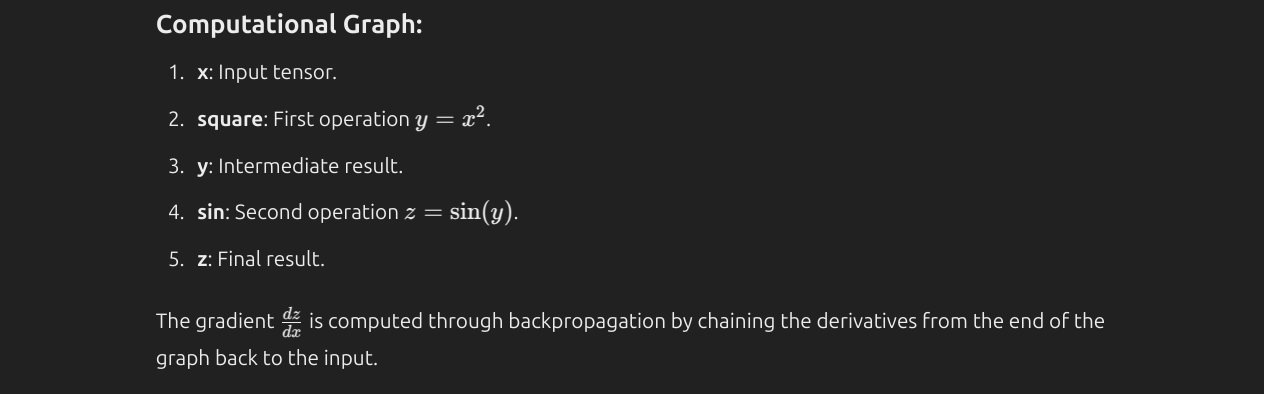

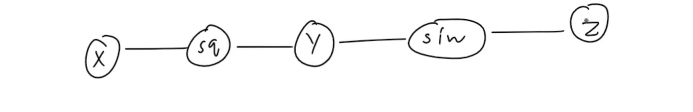

In [38]:
# y.grad is None because y is not a leaf tensor
y.grad


<ipython-input-38-2ab250fef65c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


### Lets see how this calculation is done by autograd :

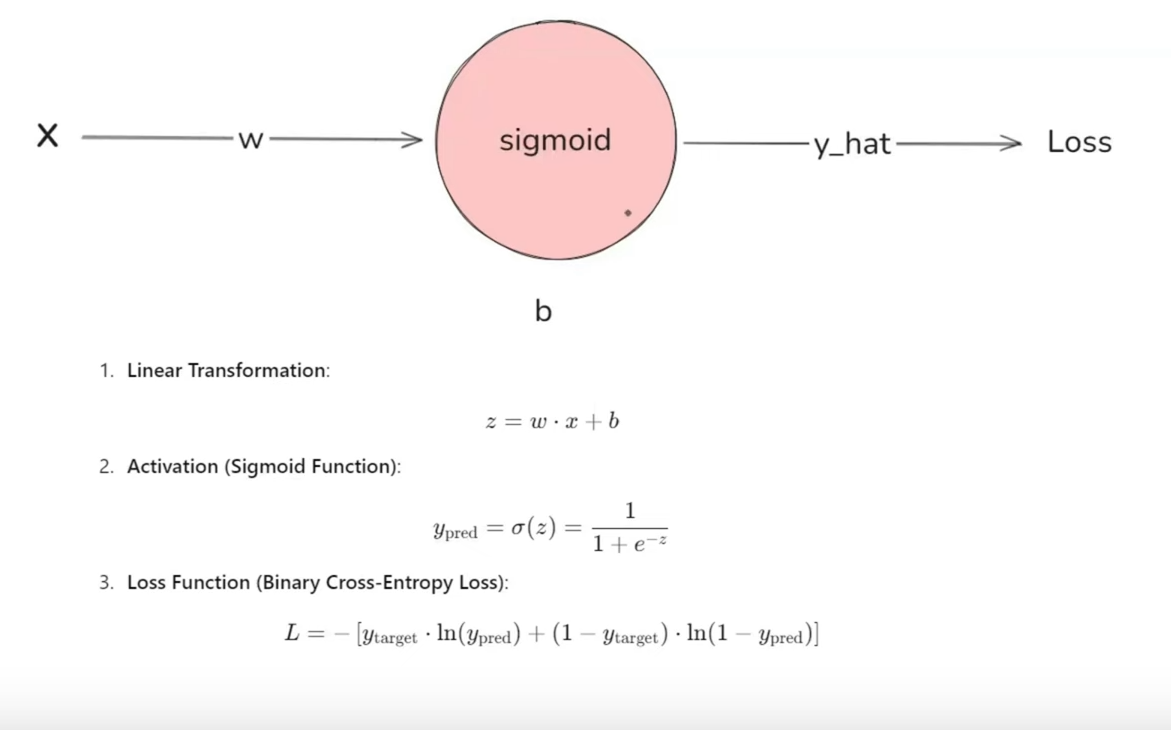

#### Forward Prop :

In [3]:
# Assume this is our dataset:
# x -> feature, y -> label
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [4]:
# Initial values of weights and biases with autograd enabled
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)


In [5]:
w

tensor(1., requires_grad=True)

In [6]:
b

tensor(0., requires_grad=True)

In [8]:
# Compute linear transformation / dot prod : z = w * x + b
z = w * x + b
z


tensor(6.7000, grad_fn=<AddBackward0>)

In [9]:
# Compute y_pred using the sigmoid activation function
y_pred = torch.sigmoid(z)
y_pred


tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [10]:
# calculate loss :
from torch.nn.functional import binary_cross_entropy_with_logits as binary_cross_entropy_loss  # Import the function
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(1.3124, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

### Back Prop :

In [11]:
# Computes the gradients of the loss with respect to w and b
loss.backward()


In [12]:
# Print the gradients of w and b after backpropagation
print(w.grad)
print(b.grad)


tensor(0.0060)
tensor(0.0009)


### Multivariable differenciation :

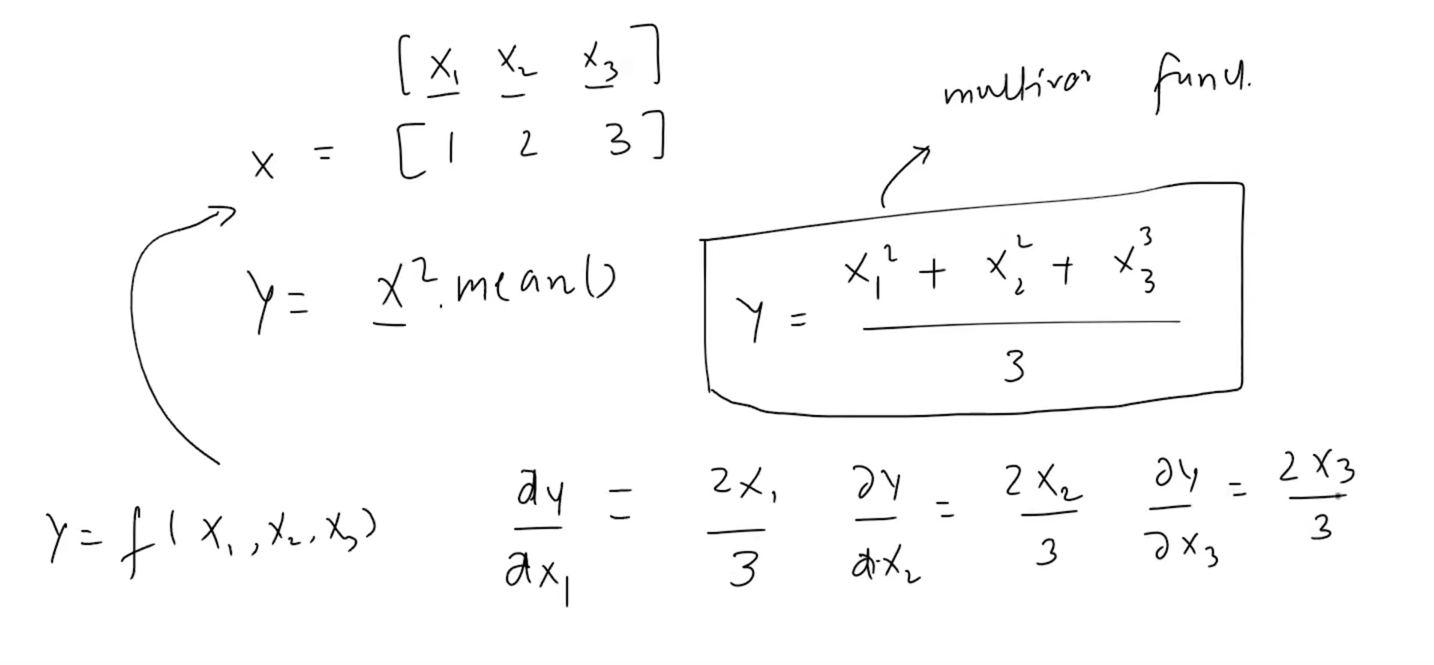

In [18]:
# Define a tensor x with multiple values and enable autograd
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)


In [19]:
x

tensor([1., 2., 3.], requires_grad=True)

In [20]:
# Compute y as the mean of squared elements in x
y = (x**2).mean()
y


tensor(4.6667, grad_fn=<MeanBackward0>)

In [21]:
# Perform backpropagation to compute dy/dx
y.backward()


In [22]:
# Get the computed gradient dy/dx
x.grad


tensor([0.6667, 1.3333, 2.0000])


### Why `x.grad.zero_()` is needed:
- In PyTorch, gradients accumulate by default, meaning each `backward()` call adds to existing gradients.
- Calling `x.grad.zero_()` clears the gradients to prevent incorrect updates in subsequent backward passes.
- This is essential during training loops to ensure each step has fresh gradients.

In [23]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [24]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [25]:
y.backward()

In [26]:
x.grad

tensor(4.)

In [27]:
# Reset gradients to zero before the next backward pass
x.grad.zero_()

tensor(0.)

### Disable gradient tracking :

In [28]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [29]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [30]:
y.backward()

In [31]:
x.grad

tensor(4.)

## 3 Ways to disable Gradient Tracking  :

In [ ]:
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [38]:
# Disables gradient tracking for x
x.requires_grad_(False)


tensor(2.)

In [33]:
x

tensor(2.)

In [34]:
y = x ** 2

In [35]:
y

tensor(4.)

In [37]:
y.backward() # wont work

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [39]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [40]:
# Creates a new tensor z with the same values as x but without gradient tracking
z = x.detach()
z


tensor(2.)

In [41]:
y = x ** 2

In [42]:
y

tensor(4., grad_fn=<PowBackward0>)

In [43]:
y1 = z ** 2
y1

tensor(4.)

In [44]:
y.backward()

In [45]:
y1.backward() # wont work

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [46]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [54]:
# Temporarily disables gradient tracking
with torch.no_grad():
    y = x ** 2  # No gradients will be recorded for this operation


In [51]:
y

tensor(4.)

In [53]:
y.backward() # wont work

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn